In [1]:
import xarray as xr
import cfgrib
import numpy as np 
import netCDF4
import matplotlib.pyplot as plt

In [2]:
era = "/home/faster/Documents/approximating_shefem/VHR-REA-reprojected.grib"
ds_grib_era = xr.open_dataset(era)

In [3]:
ds_grib_era

<xarray.Dataset>
Dimensions:     (time: 87648, lon: 100, lat: 102)
Coordinates:
  * time        (time) datetime64[ns] 2010-01-01 ... 2019-12-31T23:00:00
  * lon         (lon) float64 14.0 13.98 13.96 13.94 ... 12.08 12.06 12.04 12.02
  * lat         (lat) float64 46.04 46.02 46.0 45.98 ... 44.08 44.06 44.04 44.02
    height_10m  float32 ...
Data variables:
    PMSL        (time, lat, lon) float32 ...
    U_10M       (time, lat, lon) float32 ...
    V_10M       (time, lat, lon) float32 ...
Attributes: (12/14)
    CDI:             Climate Data Interface version 2.1.1 (https://mpimet.mpg...
    Conventions:     CF-1.4
    source:          COSMO
    institution:     CMCC (Euro-Mediterranean Center on Climate Change), REMH...
    title:           cclm-sp_2.4_terra_urb_2.3.1 simulation (0.02 Deg) forced...
    project_id:      HIGHLANDER_TEST
    ...              ...
    contact:         Mario Raffa (mario.raffa@cmcc.it)- Marianna Adinolfi (ma...
    references:      http//www.clm-community.eu, http://www.cmcc.it
    creation_date:   2022-10-22 00:28:52
    grid_mapping:    rotated_pole
    history:         Mon Mar 11 13:39:44 2024: cdo remapbil,cyl_vhrea.txt /ho...
    CDO:             Climate Data Operators version 2.1.1 (https://mpimet.mpg...

In [7]:
ds_grib_era["time"][78888+7592]

<xarray.DataArray 'time' ()>
array('2019-11-13T08:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time        datetime64[ns] 2019-11-13T08:00:00
    height_10m  float32 ...
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T

In [4]:
selected_data = ds_grib_era.sel(lat=slice(45.80,44.94), lon=slice(13.81,12.13))

In [5]:
selected_data

<xarray.Dataset>
Dimensions:     (time: 87648, lon: 84, lat: 44)
Coordinates:
  * time        (time) datetime64[ns] 2010-01-01 ... 2019-12-31T23:00:00
  * lon         (lon) float64 13.8 13.78 13.76 13.74 ... 12.2 12.18 12.16 12.14
  * lat         (lat) float64 45.8 45.78 45.76 45.74 ... 45.0 44.98 44.96 44.94
    height_10m  float32 ...
Data variables:
    PMSL        (time, lat, lon) float32 ...
    U_10M       (time, lat, lon) float32 ...
    V_10M       (time, lat, lon) float32 ...
Attributes: (12/14)
    CDI:             Climate Data Interface version 2.1.1 (https://mpimet.mpg...
    Conventions:     CF-1.4
    source:          COSMO
    institution:     CMCC (Euro-Mediterranean Center on Climate Change), REMH...
    title:           cclm-sp_2.4_terra_urb_2.3.1 simulation (0.02 Deg) forced...
    project_id:      HIGHLANDER_TEST
    ...              ...
    contact:         Mario Raffa (mario.raffa@cmcc.it)- Marianna Adinolfi (ma...
    references:      http//www.clm-community.eu, http://www.cmcc.it
    creation_date:   2022-10-22 00:28:52
    grid_mapping:    rotated_pole
    history:         Mon Mar 11 13:39:44 2024: cdo remapbil,cyl_vhrea.txt /ho...
    CDO:             Climate Data Operators version 2.1.1 (https://mpimet.mpg...

In [26]:
selected_data = selected_data.to_array()
ds_numpy_sel = selected_data.to_numpy()

In [24]:
ds_array_era = ds_grib_era.to_array()
ds_numpy_era = ds_array_era.to_numpy()

In [28]:
ds_numpy_era = ds_numpy_sel

In [29]:
ds_numpy_era[[0,2]] = ds_numpy_era[[2,0]]

In [30]:
ds_numpy_era = ds_numpy_era[:,::-1,:]

In [31]:
ds_numpy_era = np.flip(ds_numpy_era, axis = -1)

In [9]:
#ds_numpy_era = np.flip(ds_numpy_era.T, axis=(2,3))

In [38]:
ds_numpy_era.shape

(3, 87648, 44, 84)

In [39]:
years9 = ds_numpy_era[:,:78888]
year2019 = ds_numpy_era[:,78888:]

In [40]:
years9.shape

(3, 78888, 44, 84)

In [41]:
year2019.shape

(3, 8760, 44, 84)

In [43]:
np.save("VHR-REA-reprojected_and_strict_cut_mslp-u10-v10_2019",year2019)

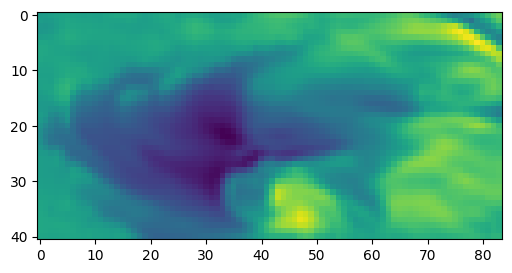

In [35]:
plt.figure(figsize= (6,6))
plt.imshow(ds_numpy_era[0,100,3:,:99])

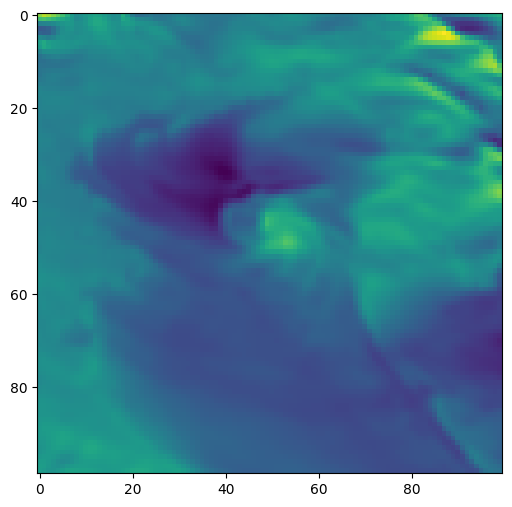

In [28]:
plt.figure(figsize= (6,6))
plt.imshow(ds_numpy_era[0,100,3:])